<div style='font-size:14pt' font-weight='bold'>Introduction to Binary classifier of natural languages </div><br>We ues the same kaggle dataset "News Headlines Dataset For Sarcasm Detection" as used in "NLP_tokenizing_embedding.ipynb". Each record consists of three attributes:
<ul>
<li>is_sarcastic: 1 if the record is sarcastic otherwise 0
<li>headline: the headline of the news article
<li>article_link: link to the original news article. Useful in collecting supplementary data
</ul><br>
The steps taken here:<br>
<ol>
<li>Import libraries and data
<li>Preprocessing step 1: Split the data into training set and test set
<li>Preprocessing step 2: Tokenizing
<li>Preprocessing step 3: Embedding
<li>Instantiate a model and compile the model
<li>Fit the model to the training set
<li>Validate the model on the test set (We do 6 and 7 at the same line of code)
</ol>
references:<br>
<a href='https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection'>kaggle competition</a>

The code of this notebook is a summary of week 2 of <a href='https://www.coursera.org/learn/natural-language-processing-tensorflow'>Natural Language Processing in Tensorflow</a>.

<hr>

<div style="font-size:12pt" font-weight-'bold'>1. Import libraries and data</div>

In [0]:
# Open this notebook on google colab or kaggle so tha you can use tensorflow 2.0
# ! pip install tensorflow==2.0

# If you are working on a different environment uder tensorflow 1.x, execute the follwoing afer importing tensorflow
# tf.enable_eager_execution()

In [63]:
# install relevant libraries
import os
import csv
import json
import zipfile
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer # Tokenizer gnerate the dictionary of words encoding 
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)

2.0.0


We save the kaggle zip file which is available <a href='https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection'>here</a> (press download) to the google drive and thus want to mount on google drive from google colab. You can skip this steps if your are working on local environment or others.<br>
<br>
<a href='https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166'>Downloading Datasets into Google Drive via Google Colab</a>

In [5]:
# Mount on google drive from google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Store the root path
root_g_path = '/content/gdrive/My Drive/'

In [8]:
# After donwloading the kaggle zip file and saving it the google drive check the directory where the file is saved 
data_path = os.path.join(root_g_path,'Coursera_NLP') 
os.listdir(data_path)

['news-headlines-dataset-for-sarcasm-detection.zip',
 'Sarcasm_Headlines_Dataset.json',
 'Sarcasm_Headlines_Dataset_v2.json',
 'NLP_tokenizing_embedding.ipynb',
 'NLP_embedding_part2.ipynb']

In [0]:
# Unzip　the data
local_zip = os.path.join(data_path,'news-headlines-dataset-for-sarcasm-detection.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(data_path)
zip_ref.close()

In [9]:
os.listdir(data_path)

['news-headlines-dataset-for-sarcasm-detection.zip',
 'Sarcasm_Headlines_Dataset.json',
 'Sarcasm_Headlines_Dataset_v2.json',
 'NLP_tokenizing_embedding.ipynb',
 'NLP_embedding_part2.ipynb']

In [0]:
file_path = os.path.join(data_path,'Sarcasm_Headlines_Dataset_v2.json')

# Open the file and pass it json.load

# The common way to read json file:
# with open(file_path, 'r') as f:
#   datasource = json.load(f)

# In this case, Extra value error occurs
# The next code works
# See https://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data
datasource = [json.loads(line) for line in open(file_path, 'r')]

In [0]:
# The dataset has three set of lists
# Create three lists 
sentences = []
labels = []
urls = []

# Iterate through the datasource and grab each item into lists
for item in datasource:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [23]:
# see the sentences
sentences[:10]

['thirtysomething scientists unveil doomsday clock of hair loss',
 'dem rep. totally nails why congress is falling short on gender, racial equality',
 'eat your veggies: 9 deliciously different recipes',
 'inclement weather prevents liar from getting to work',
 "mother comes pretty close to using word 'streaming' correctly",
 'my white inheritance',
 '5 ways to file your taxes with less stress',
 "richard branson's global-warming donation nearly as much as cost of failed balloon trips",
 'shadow government getting too large to meet in marriott conference room b',
 'lots of parents know this scenario']

In [0]:
# Set hyperparameters
# Putting hyperparameters as separate variables is very useful in the validation

vocab_size = 10000 # or 1000, original is 100000
embedding_dim = 16 # or 32, original is 16
max_length = 32 # or 16, original is 32
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"
training_size = 20000 # This data set has 27,000 records. We use 20,000 for training 

<hr>

<div style="font-size:12pt" font-weight-'bold'>2. Preprocessing step 1: Split the data into training set and test set</div>

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = np.array(labels[0:training_size],dtype=float)
testing_labels = np.array(labels[training_size:],dtype=float)

In [55]:
print(len(training_labels))
print(len(training_sentences))

print(len(testing_labels))
print(len(testing_sentences))

20000
20000
8619
8619


In [29]:
training_sentences[:10]

['thirtysomething scientists unveil doomsday clock of hair loss',
 'dem rep. totally nails why congress is falling short on gender, racial equality',
 'eat your veggies: 9 deliciously different recipes',
 'inclement weather prevents liar from getting to work',
 "mother comes pretty close to using word 'streaming' correctly",
 'my white inheritance',
 '5 ways to file your taxes with less stress',
 "richard branson's global-warming donation nearly as much as cost of failed balloon trips",
 'shadow government getting too large to meet in marriott conference room b',
 'lots of parents know this scenario']

<hr>

<div style='font-size:14pt' font-weight='bold'>3. Preprocessing step 2: Tokenizing</div>

In [0]:
# Call Tokenizer class and create tokenizer object
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

# Fit  to the training set 
tokenizer.fit_on_texts(training_sentences)

# Grab the word index
word_index = tokenizer.word_index

# Replace the words with tokens
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Padd or truncate the training sequences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Do the same thing for the test set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

<hr>

<div style='font-size:14pt' font-weight='bold'>4. Preprocessing step 3: Embedding</div>
<div style='font-size:14pt' font-weight='bold'>5. Instantiate a model and compile the model</div>

In [0]:
# Create a model

# Clear any exiting model
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')                     
])

# Compile the model
model.compile(loss='binary_crossentropy', oprtimizer='adam', metrics=['acc'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


<hr>

<div style='font-size:14pt' font-weight='bold'>
6. Fit the model to the training set<br>
7. Validate the model on the test set (We do 6 and 7 at the same line of code)
</div>


In [96]:
# Train for 30 epochs
num_epochs = 30

# Pass the padded data and labels
# If you want to validate, give the padded test data and its labels
history = model.fit(x=training_padded, y=training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.6208 - acc: 0.6785 - val_loss: 0.4923 - val_acc: 0.7993
Epoch 2/30
20000/20000 - 2s - loss: 0.4089 - acc: 0.8267 - val_loss: 0.3770 - val_acc: 0.8340
Epoch 3/30
20000/20000 - 2s - loss: 0.3350 - acc: 0.8580 - val_loss: 0.3493 - val_acc: 0.8475
Epoch 4/30
20000/20000 - 2s - loss: 0.2989 - acc: 0.8742 - val_loss: 0.3404 - val_acc: 0.8514
Epoch 5/30
20000/20000 - 2s - loss: 0.2779 - acc: 0.8841 - val_loss: 0.3397 - val_acc: 0.8545
Epoch 6/30
20000/20000 - 2s - loss: 0.2635 - acc: 0.8911 - val_loss: 0.3408 - val_acc: 0.8522
Epoch 7/30
20000/20000 - 2s - loss: 0.2533 - acc: 0.8975 - val_loss: 0.3420 - val_acc: 0.8552
Epoch 8/30
20000/20000 - 2s - loss: 0.2465 - acc: 0.8991 - val_loss: 0.3482 - val_acc: 0.8500
Epoch 9/30
20000/20000 - 2s - loss: 0.2403 - acc: 0.9032 - val_loss: 0.3470 - val_acc: 0.8531
Epoch 10/30
20000/20000 - 2s - loss: 0.2362 - acc: 0.9046 - val_loss: 0.3471 - val_acc: 0.8525
Epoch 11/3

In [71]:
type(history)
# history.history['acc']

tensorflow.python.keras.callbacks.History

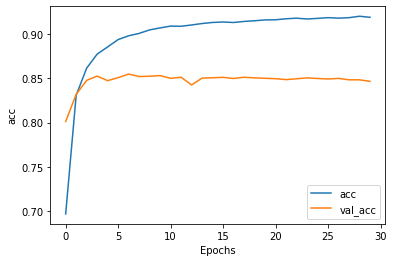

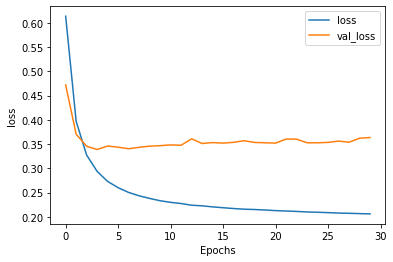

In [82]:
# vocab_size = 10000 
# embedding_dim = 16 
# max_length = 32 


def plot_graphs(history, string):
  plt.plot(history.history[string]) # training history
  plt.plot(history.history['val_'+string]) # validation history
  
  plt.xlabel("Epochs")
  plt.ylabel(string)                          
  
  plt.legend([string, 'val_'+string])

  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In this case, validation loss increase. This usually happens in text data. We should try tuning the hyperparameters to solve this.

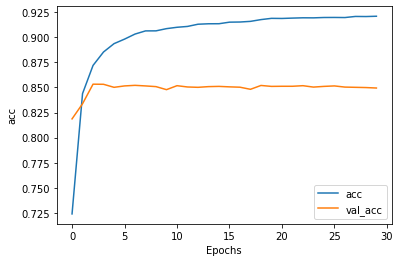

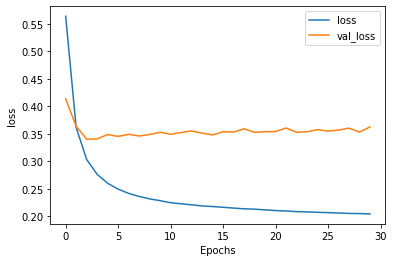

In [72]:
# Plot the results

# vocab_size = 10000 
# embedding_dim = 32 
# max_length = 32 


def plot_graphs(history, string):
  plt.plot(history.history[string]) # training history
  plt.plot(history.history['val_'+string]) # validation history
  
  plt.xlabel("Epochs")
  plt.ylabel(string)                          
  
  plt.legend([string, 'val_'+string])

  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

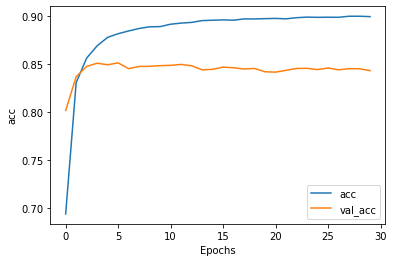

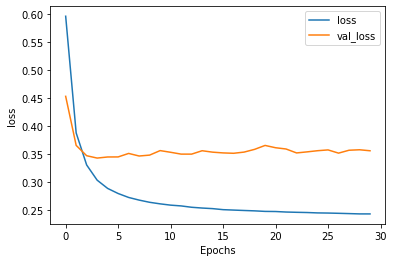

In [77]:
# Plot the results

# vocab_size = 5000 
# embedding_dim = 32 
# max_length = 32 


def plot_graphs(history, string):
  plt.plot(history.history[string]) # training history
  plt.plot(history.history['val_'+string]) # validation history
  
  plt.xlabel("Epochs")
  plt.ylabel(string)                          
  
  plt.legend([string, 'val_'+string])

  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

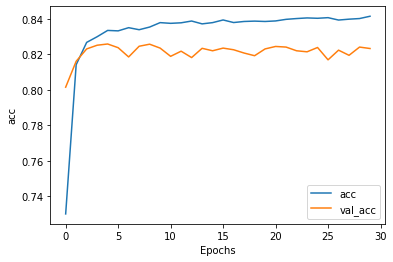

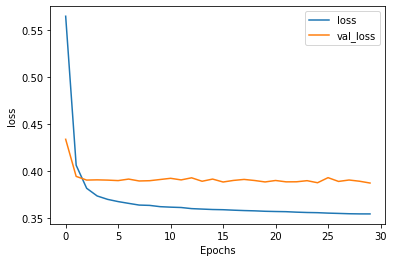

In [87]:
# Plot the results

# vocab_size = 1000 
# embedding_dim = 16 
# max_length = 16


def plot_graphs(history, string):
  plt.plot(history.history[string]) # training history
  plt.plot(history.history['val_'+string]) # validation history
  
  plt.xlabel("Epochs")
  plt.ylabel(string)                          
  
  plt.legend([string, 'val_'+string])

  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

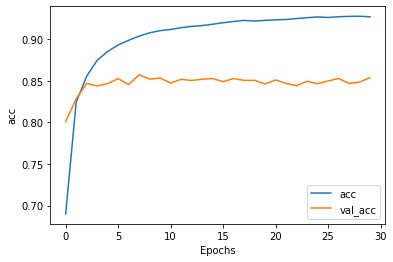

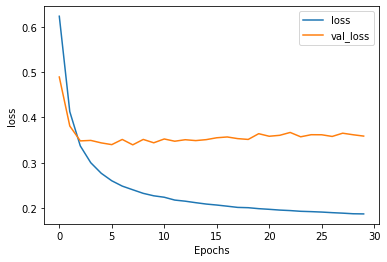

In [92]:
# Plot the results

# vocab_size = 15000 
# embedding_dim = 64 
# max_length = 64


def plot_graphs(history, string):
  plt.plot(history.history[string]) # training history
  plt.plot(history.history['val_'+string]) # validation history
  
  plt.xlabel("Epochs")
  plt.ylabel(string)                          
  
  plt.legend([string, 'val_'+string])

  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

<hr>